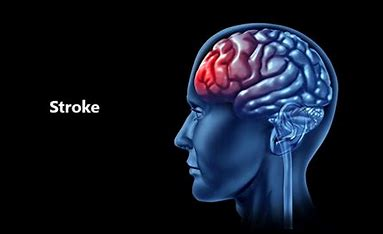

In [91]:
from IPython.display import Image
Image(filename='/kaggle/input/stroke/OIP.jpg',width=800)

# Importing necessary libraries

In [39]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px

# Reading data

In [3]:
data = pd.read_csv("/kaggle/input/stroke-prediction/stroke_prediction_dataset.csv")

In [4]:
data.head()

,Patient ID,Patient Name,Age,Gender,Hypertension,Heart Disease,Marital Status,Work Type,Residence Type,Average Glucose Level,...,Alcohol Intake,Physical Activity,Stroke History,Family History of Stroke,Dietary Habits,Stress Levels,Blood Pressure Levels,Cholesterol Levels,Symptoms,Diagnosis
0,18153,Mamooty Khurana,56,Male,0,1,Married,Self-employed,Rural,130.91,...,Social Drinker,Moderate,0,Yes,Vegan,3.48,140/108,"HDL: 68, LDL: 133","Difficulty Speaking, Headache",Stroke
1,62749,Kaira Subramaniam,80,Male,0,0,Single,Self-employed,Urban,183.73,...,Never,Low,0,No,Paleo,1.73,146/91,"HDL: 63, LDL: 70","Loss of Balance, Headache, Dizziness, Confusion",Stroke
2,32145,Dhanush Balan,26,Male,1,1,Married,Never Worked,Rural,189.00,...,Rarely,High,0,Yes,Paleo,7.31,154/97,"HDL: 59, LDL: 95","Seizures, Dizziness",Stroke
3,6154,Ivana Baral,73,Male,0,0,Married,Never Worked,Urban,185.29,...,Frequent Drinker,Moderate,0,No,Paleo,5.35,174/81,"HDL: 70, LDL: 137","Seizures, Blurred Vision, Severe Fatigue, Head...",No Stroke
4,48973,Darshit Jayaraman,51,Male,1,1,Divorced,Self-employed,Urban,177.34,...,Rarely,Low,0,Yes,Pescatarian,6.84,121/95,"HDL: 65, LDL: 68",Difficulty Speaking,Stroke


In [6]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15000 entries, 0 to 14999
Data columns (total 22 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Patient ID                15000 non-null  int64  
 1   Patient Name              15000 non-null  object 
 2   Age                       15000 non-null  int64  
 3   Gender                    15000 non-null  object 
 4   Hypertension              15000 non-null  int64  
 5   Heart Disease             15000 non-null  int64  
 6   Marital Status            15000 non-null  object 
 7   Work Type                 15000 non-null  object 
 8   Residence Type            15000 non-null  object 
 9   Average Glucose Level     15000 non-null  float64
 10  Body Mass Index (BMI)     15000 non-null  float64
 11  Smoking Status            15000 non-null  object 
 12  Alcohol Intake            15000 non-null  object 
 13  Physical Activity         15000 non-null  object 
 14  Stroke

In [8]:
data.columns

Index(['Patient ID', 'Patient Name', 'Age', 'Gender', 'Hypertension',
       'Heart Disease', 'Marital Status', 'Work Type', 'Residence Type',
       'Average Glucose Level', 'Body Mass Index (BMI)', 'Smoking Status',
       'Alcohol Intake', 'Physical Activity', 'Stroke History',
       'Family History of Stroke', 'Dietary Habits', 'Stress Levels',
       'Blood Pressure Levels', 'Cholesterol Levels', 'Symptoms', 'Diagnosis'],
      dtype='object')

# Checking for null values

In [5]:
data.isna().sum()

Patient ID                     0
Patient Name                   0
Age                            0
Gender                         0
Hypertension                   0
Heart Disease                  0
Marital Status                 0
Work Type                      0
Residence Type                 0
Average Glucose Level          0
Body Mass Index (BMI)          0
Smoking Status                 0
Alcohol Intake                 0
Physical Activity              0
Stroke History                 0
Family History of Stroke       0
Dietary Habits                 0
Stress Levels                  0
Blood Pressure Levels          0
Cholesterol Levels             0
Symptoms                    2500
Diagnosis                      0
dtype: int64

In [9]:
data[data['Symptoms'].isnull()]

,Patient ID,Patient Name,Age,Gender,Hypertension,Heart Disease,Marital Status,Work Type,Residence Type,Average Glucose Level,...,Alcohol Intake,Physical Activity,Stroke History,Family History of Stroke,Dietary Habits,Stress Levels,Blood Pressure Levels,Cholesterol Levels,Symptoms,Diagnosis
6,25525,Elakshi Karan,40,Female,1,0,Married,Private,Urban,77.83,...,Never,Low,1,No,Vegetarian,6.38,178/105,"HDL: 31, LDL: 134",NaN,No Stroke
9,37504,Krish Kulkarni,82,Male,0,0,Divorced,Self-employed,Urban,111.23,...,Rarely,High,1,Yes,Non-Vegetarian,8.39,119/88,"HDL: 32, LDL: 88",NaN,No Stroke
29,28610,Miraya Kaur,63,Male,0,1,Married,Never Worked,Urban,107.84,...,Never,Low,1,No,Paleo,4.69,123/63,"HDL: 67, LDL: 102",NaN,Stroke
32,28323,Zain Kari,71,Male,0,1,Divorced,Self-employed,Urban,162.15,...,Frequent Drinker,Moderate,0,No,Pescatarian,9.80,108/80,"HDL: 46, LDL: 60",NaN,No Stroke
43,54061,Kartik Chauhan,25,Male,0,0,Single,Self-employed,Rural,196.98,...,Never,High,1,No,Vegan,4.39,121/85,"HDL: 56, LDL: 83",NaN,No Stroke
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
14985,14080,Pihu Mani,75,Male,1,1,Single,Self-employed,Urban,114.77,...,Frequent Drinker,Moderate,0,No,Gluten-Free,0.23,143/72,"HDL: 33, LDL: 95",NaN,Stroke
14986,63763,Trisha Konda,79,Male,0,0,Married,Self-employed,Urban,77.82,...,Social Drinker,High,0,No,Gluten-Free,7.59,91/65,"HDL: 38, LDL: 64",NaN,No Stroke
14990,4140,Nitya Mangal,47,Female,0,1,Single,Never Worked,Rural,117.64,...,Social Drinker,Moderate,1,Yes,Vegan,3.67,156/70,"HDL: 43, LDL: 94",NaN,Stroke
14993,12868,Uthkarsh Dhaliwal,90,Female,1,0,Divorced,Private,Urban,199.79,...,Rarely,Low,1,Yes,Keto,2.11,108/61,"HDL: 80, LDL: 162",NaN,Stroke


In [11]:
data[data['Diagnosis'] == 'Stroke']['Symptoms'].isnull().sum()

1219

I’ve decided to exclude the Symptoms column from my analysis, focusing instead on the other available factors. For those diagnosed with a stroke and those without, you could fill in the average symptom values.

In [12]:
data.drop('Symptoms', axis=1, inplace=True)


In [13]:
data.head()

,Patient ID,Patient Name,Age,Gender,Hypertension,Heart Disease,Marital Status,Work Type,Residence Type,Average Glucose Level,...,Smoking Status,Alcohol Intake,Physical Activity,Stroke History,Family History of Stroke,Dietary Habits,Stress Levels,Blood Pressure Levels,Cholesterol Levels,Diagnosis
0,18153,Mamooty Khurana,56,Male,0,1,Married,Self-employed,Rural,130.91,...,Non-smoker,Social Drinker,Moderate,0,Yes,Vegan,3.48,140/108,"HDL: 68, LDL: 133",Stroke
1,62749,Kaira Subramaniam,80,Male,0,0,Single,Self-employed,Urban,183.73,...,Non-smoker,Never,Low,0,No,Paleo,1.73,146/91,"HDL: 63, LDL: 70",Stroke
2,32145,Dhanush Balan,26,Male,1,1,Married,Never Worked,Rural,189.00,...,Formerly Smoked,Rarely,High,0,Yes,Paleo,7.31,154/97,"HDL: 59, LDL: 95",Stroke
3,6154,Ivana Baral,73,Male,0,0,Married,Never Worked,Urban,185.29,...,Non-smoker,Frequent Drinker,Moderate,0,No,Paleo,5.35,174/81,"HDL: 70, LDL: 137",No Stroke
4,48973,Darshit Jayaraman,51,Male,1,1,Divorced,Self-employed,Urban,177.34,...,Currently Smokes,Rarely,Low,0,Yes,Pescatarian,6.84,121/95,"HDL: 65, LDL: 68",Stroke


The patient ID and patient name are not contributing much, so these will also be dropped.

In [14]:
data.drop(['Patient ID', 'Patient Name'], axis=1, inplace=True)

In [15]:
data.head()

,Age,Gender,Hypertension,Heart Disease,Marital Status,Work Type,Residence Type,Average Glucose Level,Body Mass Index (BMI),Smoking Status,Alcohol Intake,Physical Activity,Stroke History,Family History of Stroke,Dietary Habits,Stress Levels,Blood Pressure Levels,Cholesterol Levels,Diagnosis
0,56,Male,0,1,Married,Self-employed,Rural,130.91,22.37,Non-smoker,Social Drinker,Moderate,0,Yes,Vegan,3.48,140/108,"HDL: 68, LDL: 133",Stroke
1,80,Male,0,0,Single,Self-employed,Urban,183.73,32.57,Non-smoker,Never,Low,0,No,Paleo,1.73,146/91,"HDL: 63, LDL: 70",Stroke
2,26,Male,1,1,Married,Never Worked,Rural,189.00,20.32,Formerly Smoked,Rarely,High,0,Yes,Paleo,7.31,154/97,"HDL: 59, LDL: 95",Stroke
3,73,Male,0,0,Married,Never Worked,Urban,185.29,27.50,Non-smoker,Frequent Drinker,Moderate,0,No,Paleo,5.35,174/81,"HDL: 70, LDL: 137",No Stroke
4,51,Male,1,1,Divorced,Self-employed,Urban,177.34,29.06,Currently Smokes,Rarely,Low,0,Yes,Pescatarian,6.84,121/95,"HDL: 65, LDL: 68",Stroke


# Feature Engineering

Dividing Blood Pressure Level column into systolic blood pressure and diastolic blood pressure

In [16]:
# Splitting the 'Blood Pressure Levels' column into 'Systolic Blood Pressure' and 'Diastolic Blood Pressure'
data[['Systolic Blood Pressure', 'Diastolic Blood Pressure']] = data['Blood Pressure Levels'].str.split('/', expand=True)

In [17]:
# Dropping the original 'Blood Pressure Levels' column
data.drop('Blood Pressure Levels', axis=1, inplace=True)

In [18]:
data.head()

,Age,Gender,Hypertension,Heart Disease,Marital Status,Work Type,Residence Type,Average Glucose Level,Body Mass Index (BMI),Smoking Status,Alcohol Intake,Physical Activity,Stroke History,Family History of Stroke,Dietary Habits,Stress Levels,Cholesterol Levels,Diagnosis,Systolic Blood Pressure,Diastolic Blood Pressure
0,56,Male,0,1,Married,Self-employed,Rural,130.91,22.37,Non-smoker,Social Drinker,Moderate,0,Yes,Vegan,3.48,"HDL: 68, LDL: 133",Stroke,140,108
1,80,Male,0,0,Single,Self-employed,Urban,183.73,32.57,Non-smoker,Never,Low,0,No,Paleo,1.73,"HDL: 63, LDL: 70",Stroke,146,91
2,26,Male,1,1,Married,Never Worked,Rural,189.00,20.32,Formerly Smoked,Rarely,High,0,Yes,Paleo,7.31,"HDL: 59, LDL: 95",Stroke,154,97
3,73,Male,0,0,Married,Never Worked,Urban,185.29,27.50,Non-smoker,Frequent Drinker,Moderate,0,No,Paleo,5.35,"HDL: 70, LDL: 137",No Stroke,174,81
4,51,Male,1,1,Divorced,Self-employed,Urban,177.34,29.06,Currently Smokes,Rarely,Low,0,Yes,Pescatarian,6.84,"HDL: 65, LDL: 68",Stroke,121,95


Dividing Cholesterol Level column into HDL and LDL

In [19]:
# Extracting HDL and LDL values
data['HDL'] = data['Cholesterol Levels'].str.extract('HDL: (\d+)', expand=True)
data['LDL'] = data['Cholesterol Levels'].str.extract('LDL: (\d+)', expand=True)

In [20]:
# Dropping the original 'Cholesterol Levels' column
data.drop('Cholesterol Levels', axis=1, inplace=True)


In [21]:
data.head()

,Age,Gender,Hypertension,Heart Disease,Marital Status,Work Type,Residence Type,Average Glucose Level,Body Mass Index (BMI),Smoking Status,...,Physical Activity,Stroke History,Family History of Stroke,Dietary Habits,Stress Levels,Diagnosis,Systolic Blood Pressure,Diastolic Blood Pressure,HDL,LDL
0,56,Male,0,1,Married,Self-employed,Rural,130.91,22.37,Non-smoker,...,Moderate,0,Yes,Vegan,3.48,Stroke,140,108,68,133
1,80,Male,0,0,Single,Self-employed,Urban,183.73,32.57,Non-smoker,...,Low,0,No,Paleo,1.73,Stroke,146,91,63,70
2,26,Male,1,1,Married,Never Worked,Rural,189.00,20.32,Formerly Smoked,...,High,0,Yes,Paleo,7.31,Stroke,154,97,59,95
3,73,Male,0,0,Married,Never Worked,Urban,185.29,27.50,Non-smoker,...,Moderate,0,No,Paleo,5.35,No Stroke,174,81,70,137
4,51,Male,1,1,Divorced,Self-employed,Urban,177.34,29.06,Currently Smokes,...,Low,0,Yes,Pescatarian,6.84,Stroke,121,95,65,68


# EDA

**1. Distribution of Strokes between Males and Female**

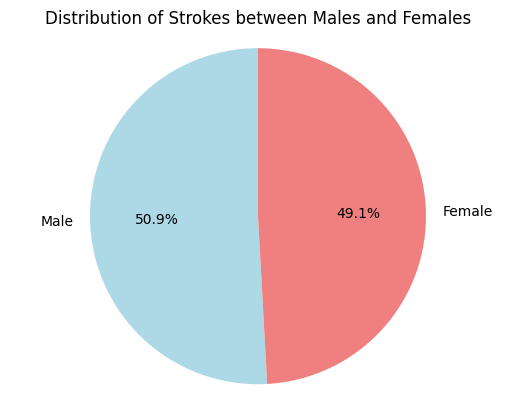

In [24]:
# Counting the occurrences of 'Stroke' in the 'Diagnosis' column based on 'Gender'
stroke_counts = data[data['Diagnosis'] == 'Stroke']['Gender'].value_counts()

# Creating a pie chart
plt.pie(stroke_counts, labels=stroke_counts.index, autopct='%1.1f%%', startangle=90, colors=['lightblue', 'lightcoral'])
plt.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.
plt.title('Distribution of Strokes between Males and Females')
plt.savefig("1.png")
plt.show()

#### Insights
**Males:** The chart shows that 50.9% of the stroke cases are males. This indicates that males have a slightly higher incidence of strokes.
**Females:** Females account for 49.1% of the stroke cases, which is nearly half of the total cases.

**2. Presence of Hypertension in Individuals Diagnosed with Stroke**

In [27]:
data['Hypertension'].value_counts()

Hypertension
0    11265
1     3735
Name: count, dtype: int64

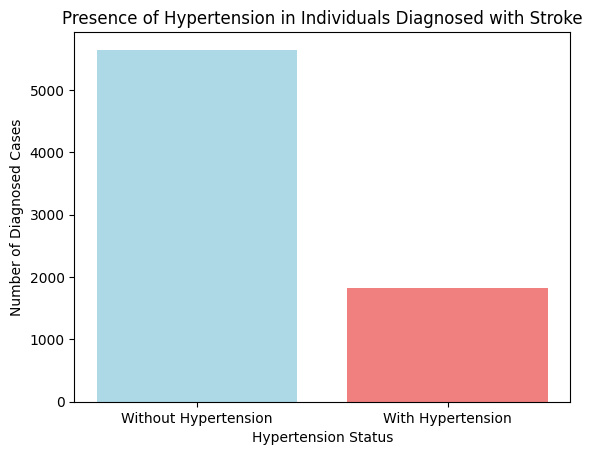

In [26]:
# Counting the occurrences of 'Hypertension' in the 'Diagnosis' column based on whether the patient has hypertension
hypertension_counts = data[data['Diagnosis'] == 'Stroke']['Hypertension'].value_counts()

# Creating a bar plot
plt.bar(['Without Hypertension', 'With Hypertension'], hypertension_counts, color=['lightblue', 'lightcoral'])
plt.title('Presence of Hypertension in Individuals Diagnosed with Stroke')
plt.xlabel('Hypertension Status')
plt.ylabel('Number of Diagnosed Cases')
plt.savefig('2.png')
plt.show()


#### Insights
**Without Hypertension:** The taller blue bar represents individuals diagnosed with stroke who do not have hypertension. This group is larger, suggesting that a significant number of stroke cases occur in individuals without hypertension.

**With Hypertension:** The shorter red bar represents individuals diagnosed with stroke who have hypertension. This group is smaller compared to those without hypertension.

**3. Composition of Marital Status among Individuals Diagnosed with Stroke**

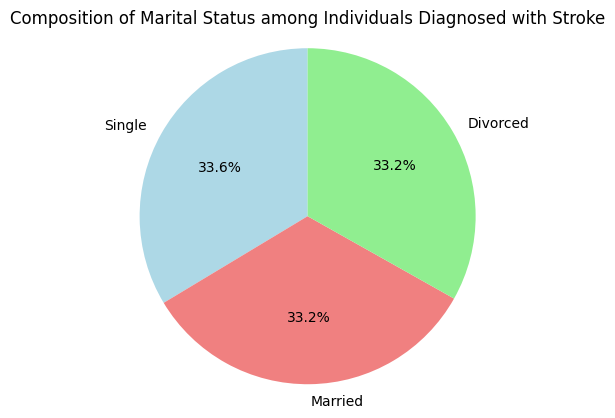

In [30]:
# Counting the occurrences of 'Marital Status' in the 'Diagnosis' column based on marital status
marital_status_counts = data[data['Diagnosis'] == 'Stroke']['Marital Status'].value_counts()

# Creating a pie chart
plt.pie(marital_status_counts, labels=marital_status_counts.index, autopct='%1.1f%%', startangle=90, colors=['lightblue', 'lightcoral', 'lightgreen'])
plt.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.
plt.title('Composition of Marital Status among Individuals Diagnosed with Stroke')
plt.savefig('3.png')
plt.show()


#### Insights
**Single:** The blue section of the chart represents single individuals, accounting for 33.6% of the stroke cases.

**Divorced:** The green section represents divorced individuals, who make up 33.2% of the stroke cases.

**Married:** The pink section represents married individuals, also accounting for 33.2% of the stroke cases.

This data suggests that stroke affects individuals across different marital statuses almost equally.

**4. Work Type of People Diagnosed with Stroke**

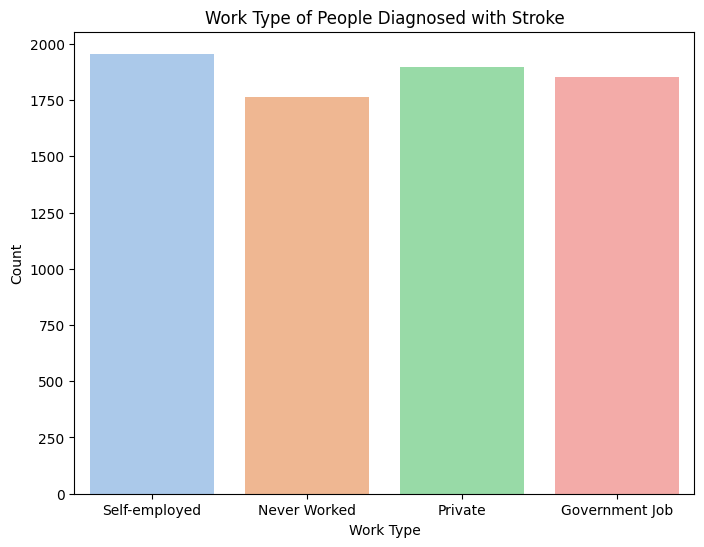

In [35]:
# Filtering data for diagnosed stroke
diagnosed_stroke_data = data[data['Diagnosis'] == 'Stroke']

# Creating a count plot
plt.figure(figsize=(8, 6))
sns.countplot(x='Work Type', data=diagnosed_stroke_data, palette='pastel')
plt.title('Work Type of People Diagnosed with Stroke')
plt.xlabel('Work Type')
plt.ylabel('Count')
plt.savefig('4.png')
plt.show()


#### Insights

**Self-Employed:** The tallest blue bar represents self-employed individuals. This group has the highest number of stroke cases, suggesting that self-employed individuals might be at a higher risk.

**Never Worked:** The green bar represents individuals who have never worked. This group has the second highest number of stroke cases.

**Private Jobs:** The orange bar represents individuals in private jobs. This group has the third highest number of stroke cases.

**Government Jobs:** The pink bar represents individuals in government jobs. This group has the least number of stroke cases among the categories presented.

This data suggests that work type could potentially influence the risk of stroke, with self-employed individuals being the most affected.

**5. Residence Type of People Diagnosed with and without Stroke**

In [44]:
# Grouping the data by 'Residence Type' and 'Diagnosis'
grouped_data = data.groupby(['Residence Type', 'Diagnosis']).size().unstack().reset_index()

# Plotting a stacked bar chart using Plotly
fig = px.bar(grouped_data, x='Residence Type', y=['No Stroke', 'Stroke'], title='Residence Type of People Diagnosed with and without Stroke',
             barmode='stack', color_discrete_sequence=['lightblue', 'lightcoral'])

fig.show()


#### Insights
**Urban Areas:** The red bar represents the number of people diagnosed with stroke in urban areas, which is higher than that in rural areas. This suggests that urban residents might have a higher risk of stroke.

**Rural Areas:** The blue bar represents the number of people without stroke in rural areas, which is higher than that in urban areas. This indicates that rural residents might have a lower risk of stroke.

**6. Diagnosis Values against Average Glucose Level**

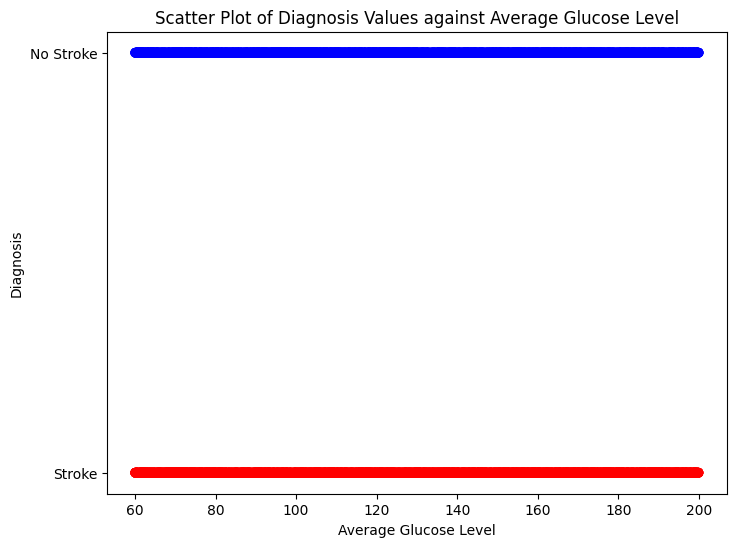

In [52]:
# Creating a scatter plot
plt.figure(figsize=(8, 6))
plt.scatter(data['Average Glucose Level'], data['Diagnosis'], color=['red' if x == 'Stroke' else 'blue' for x in data['Diagnosis']])
plt.title('Scatter Plot of Diagnosis Values against Average Glucose Level')
plt.xlabel('Average Glucose Level')
plt.ylabel('Diagnosis')
plt.savefig('6.png')
plt.show()


In [51]:
data['Average Glucose Level'].max()

200.0

#### Insights

The data implies that the average glucose level may not be a significant factor in determining whether a stroke occurs or not.

**7. BMI Values for Stroke and Non-Stroke Patients**

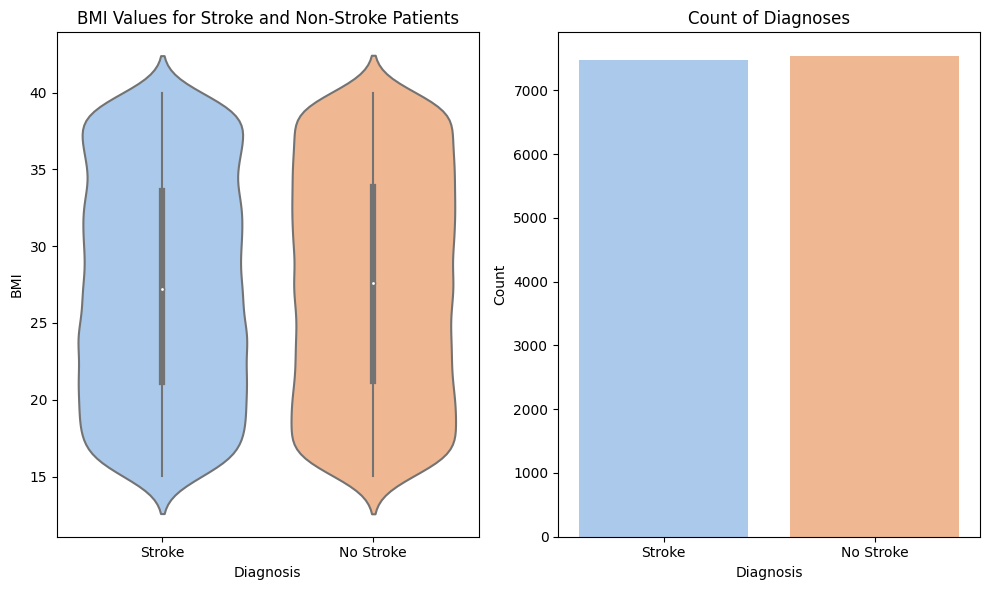

In [63]:
# Creating a combined violin and count plot
plt.figure(figsize=(10, 6))
plt.subplot(1, 2, 1)
sns.violinplot(x='Diagnosis', y='Body Mass Index (BMI)', data=data, palette='pastel')
plt.title('BMI Values for Stroke and Non-Stroke Patients')
plt.xlabel('Diagnosis')
plt.ylabel('BMI')

plt.subplot(1, 2, 2)
sns.countplot(x='Diagnosis', data=data, palette='pastel')
plt.title('Count of Diagnoses')
plt.xlabel('Diagnosis')
plt.ylabel('Count')

plt.tight_layout()
plt.savefig('7.png')
plt.show()


#### Insights
**Violin Plot:** The left panel of the graph is a violin plot, which shows the distribution of BMI values for stroke and non-stroke patients. It appears that the median BMI value for stroke patients is higher than for non-stroke patients. This suggests that a higher BMI might be associated with an increased risk of stroke.

**Bar Graph:** The right panel of the graph is a bar graph, which shows the count of diagnoses for stroke and non-stroke patients. It indicates that there are more non-stroke patients than stroke patients in this dataset.

**8. Smoking Status of Patients Diagnosed with Stroke**

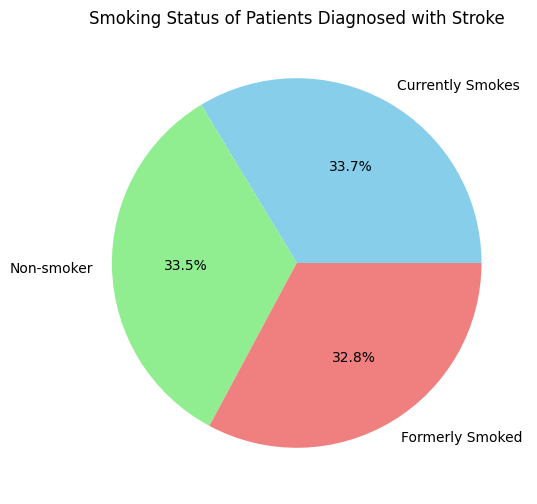

In [67]:
# Filtering data for diagnosed stroke
diagnosed_stroke_data = data[data['Diagnosis'] == 'Stroke']

# Grouping the data by 'Smoking Status'
grouped_data = diagnosed_stroke_data['Smoking Status'].value_counts()

# Plotting a pie chart
plt.figure(figsize=(8, 6))
plt.pie(grouped_data, labels=grouped_data.index, autopct='%1.1f%%', colors=['skyblue', 'lightgreen', 'lightcoral'])
plt.title('Smoking Status of Patients Diagnosed with Stroke')
plt.savefig('8.png')
plt.show()


#### Insights
**Currently Smokes:** The green section of the chart represents patients who currently smoke, accounting for 33.7% of the stroke cases.

**Formerly Smoked:** The red section represents patients who formerly smoked, making up 32.8% of the stroke cases.

**Non-smoker:** The blue section represents non-smokers, accounting for 33.5% of the stroke cases.

**9. Alcohol Intake of Patients Diagnosed with Stroke**

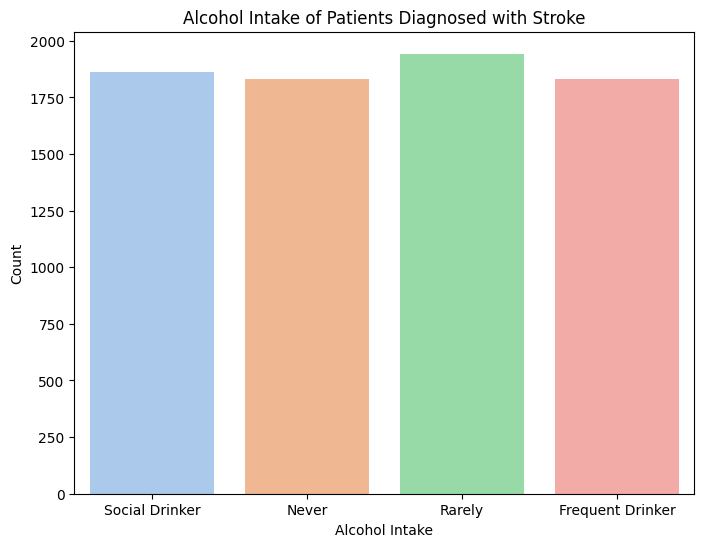

In [69]:
# Filtering data for diagnosed stroke
diagnosed_stroke_data = data[data['Diagnosis'] == 'Stroke']

# Creating a count plot
plt.figure(figsize=(8, 6))
sns.countplot(x='Alcohol Intake', data=diagnosed_stroke_data, palette='pastel')
plt.title('Alcohol Intake of Patients Diagnosed with Stroke')
plt.xlabel('Alcohol Intake')
plt.ylabel('Count')
plt.savefig('9.png')
plt.show()


#### Insights
**Social Drinker:** The tallest blue bar represents social drinkers. This group has the second highest number of stroke cases. 
**Never:** The green bar represents individuals who never drink alcohol. This group has the least number of stroke cases among the categories presented.

**Rarely:** The orange bar represents individuals who rarely drink alcohol. This group has the highest number of stroke cases.

**Frequent Drinker:** The pink bar represents frequent drinkers. This group has the second least number of stroke cases.

This data suggests that alcohol intake could potentially influence the risk of stroke.

**10. Physical Activity of Patients Diagnosed with Stroke**

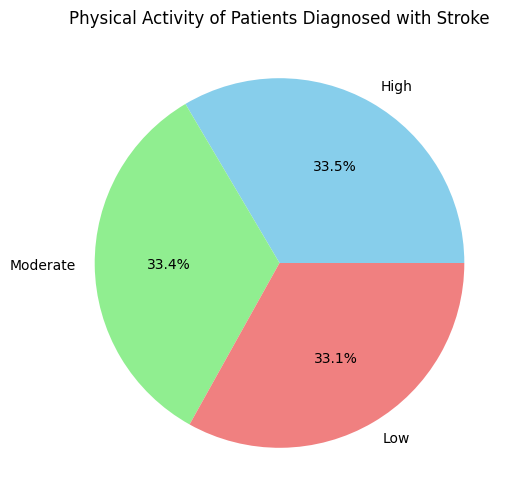

In [74]:
# Filtering data for diagnosed stroke
diagnosed_stroke_data = data[data['Diagnosis'] == 'Stroke']

# Grouping the data by 'Physical Activity'
grouped_data = diagnosed_stroke_data['Physical Activity'].value_counts()

# Plotting a pie chart
plt.figure(figsize=(8, 6))
plt.pie(grouped_data, labels=grouped_data.index, autopct='%1.1f%%', colors=['skyblue', 'lightgreen', 'lightcoral'])
plt.title('Physical Activity of Patients Diagnosed with Stroke')
plt.savefig('10.png')
plt.show()


#### Insights

**High Physical Activity:** The green section of the chart represents patients with high physical activity levels, accounting for 33.5% of the stroke cases.

**Moderate Physical Activity:** The blue section represents patients with moderate physical activity levels, making up 33.4% of the stroke cases.

**Low Physical Activity:** The red section represents patients with low physical activity levels, accounting for 33.1% of the stroke cases.

This data suggests that stroke affects individuals across different physical activity levels almost equally, with a slightly higher percentage of patients having high physical activity levels.

**11. Stroke History for Patients Diagnosed with Stroke**

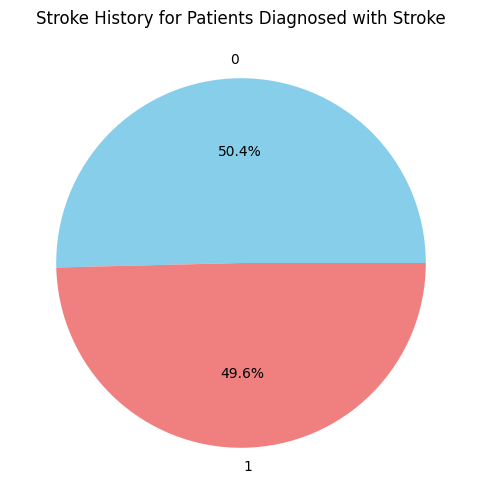

In [78]:
# Filtering data for patients diagnosed with stroke
stroke_data = data[data['Diagnosis'] == 'Stroke']

# Grouping the data by 'Stroke History'
grouped_data = stroke_data['Stroke History'].value_counts()

# Plotting a pie chart
plt.figure(figsize=(6, 6))
plt.pie(grouped_data, labels=grouped_data.index, autopct='%1.1f%%', colors=['skyblue', 'lightcoral'])
plt.title('Stroke History for Patients Diagnosed with Stroke')
plt.savefig('11.png')
plt.show()


#### Insights
**No History of Stroke:** The blue section of the chart represents patients who have a history of stroke, accounting for 50.4% of the stroke cases.

**History of Stroke:** The red section represents patients who do not have a history of stroke, accounting for 49.6% of the stroke cases.

This data suggests that not having a history of stroke might be a significant risk factor for subsequent strokes.

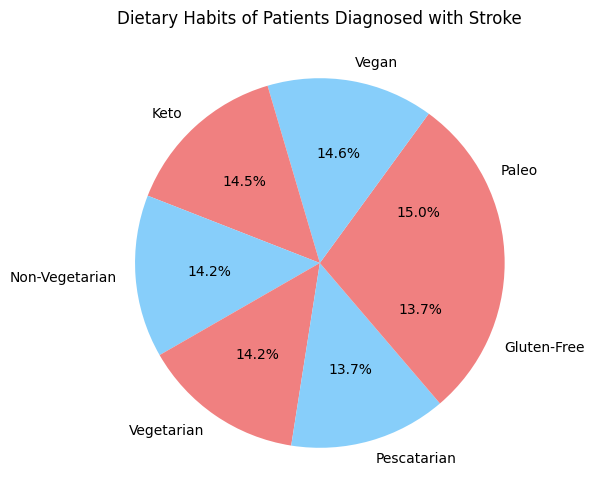

In [82]:
# Filtering data for patients diagnosed with stroke
stroke_data = data[data['Diagnosis'] == 'Stroke']

# Grouping the data by 'Dietary Habits'
grouped_data = stroke_data['Dietary Habits'].value_counts()

# Customizing colors for the pie chart
colors = ['lightcoral', 'lightskyblue']

# Plotting a pie chart with custom colors
plt.figure(figsize=(6, 6))
plt.pie(grouped_data, labels=grouped_data.index, autopct='%1.1f%%', colors=colors)
plt.title('Dietary Habits of Patients Diagnosed with Stroke')
plt.savefig('12.png')
plt.show()


#### Insights
**Paleo:** The largest section of the chart represents patients following a Paleo diet, accounting for 15.0% of the stroke cases.

**Pescatarian:** The smallest section of the chart represents Pescatarian patients, accounting for 13.7% of the stroke cases.

**Other Diets:** The remaining sections represent Keto, Vegan, Gluten-Free, Vegetarian, and Non-Vegetarian diets. Each of these diets accounts for between 14.2% and 14.6% of the stroke cases.

This data suggests that stroke affects individuals across different dietary habits almost equally.

# Conclusion

Based on the insights from the data, it appears that stroke affects individuals across a wide range of demographics and lifestyle factors. Here are some key conclusions:

1. Gender: Stroke affects both genders almost equally, with a slight edge towards males.
2. Hypertension: While hypertension is a known risk factor for stroke, a large number of stroke cases occur in individuals without this condition.
3. Marital Status: Stroke affects individuals across different marital statuses almost equally.
4. Work Type: Self-employed individuals have the highest incidence of strokes.
5. Residence Type: Urban residents might have a higher risk of stroke compared to rural residents.
6. Glucose Levels: The data suggests that average glucose level could potentially be a significant factor in stroke risk.
7. Smoking Status: Stroke affects individuals across different smoking statuses almost equally.
8. Alcohol Intake: Social drinkers have the highest number of stroke cases, suggesting that social drinking might be associated with an increased risk of stroke.
9. Physical Activity Levels: Stroke affects individuals across different physical activity levels almost equally.
10. Dietary Habits: Stroke affects individuals across different dietary habits almost equally.

While these factors might be associated with stroke, other factors such as age, lifestyle, and genetics could also play a significant role. Therefore, a comprehensive analysis should consider these factors as well. It’s also crucial to keep in mind that individual health outcomes can vary greatly, and these conclusions are based on aggregate data. Always consult with healthcare professionals for personalized medical advice.